In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
def load_wine_data(path_to_dir, filename, csv_separator):
    csv_path = os.path.join(path_to_dir, filename)
    return pd.read_csv(csv_path, sep=csv_separator)
#os.path.dirname(path) return the parent directory of the given path
PARENT_DIR = os.path.dirname(os.getcwd())
WINE_DIR = os.path.join(PARENT_DIR, "Data set")
print(PARENT_DIR)
print(WINE_DIR)

D:\studygit1\WineQuality
D:\studygit1\WineQuality\Data set


In [5]:
df_red_wine = load_wine_data(WINE_DIR, "winequality-red.csv", ";")

In [6]:
%matplotlib inline

In [ ]:
### Visualize before scaling

In [7]:
np_red_features = df_red_wine.columns.values
np_red_features_reshaped = np_red_features.reshape(6, 2)
np_red_features_reshaped

array([['fixed acidity', 'volatile acidity'],
       ['citric acid', 'residual sugar'],
       ['chlorides', 'free sulfur dioxide'],
       ['total sulfur dioxide', 'density'],
       ['pH', 'sulphates'],
       ['alcohol', 'quality']], dtype=object)

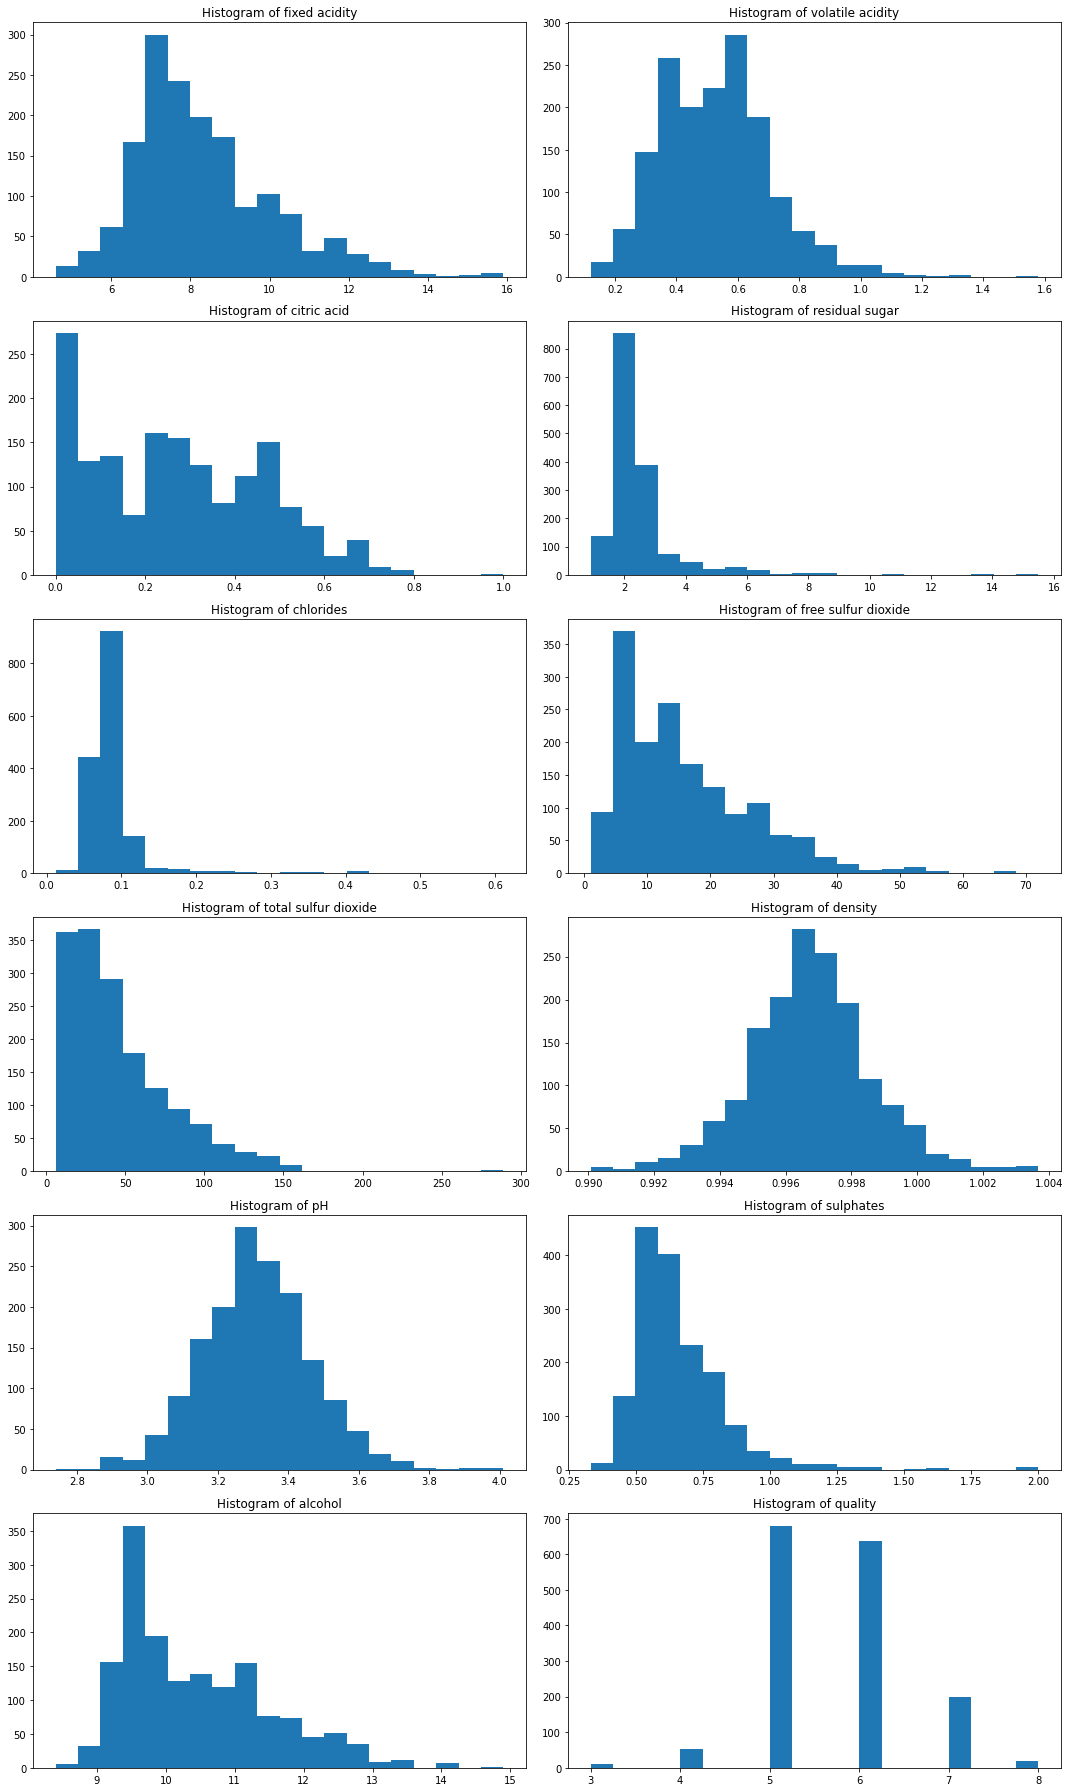

In [8]:
fig, axes = plt.subplots(6, 2, figsize=(15, 25))
for i in range(6):
    for j in range(2):
        feature = np_red_features_reshaped[i, j]
        axes[i, j].hist(df_red_wine[feature], bins=20)
        axes[i, j].set_title(f"Histogram of {np_red_features_reshaped[i, j]}")
fig.tight_layout()

In [ ]:
### Feture Scaling using MaxAbsScaler
- Find the absolute maximum value of the feature in the dataset
- Divide all the values in the column by that maximum value
- If we do this for all the numerical columns, then all their values will lie between -1 and 1

In [12]:
from sklearn.preprocessing import MaxAbsScaler

In [14]:
transformer = MaxAbsScaler().fit(df_red_wine)
df_trans_red = transformer.transform(df_red_wine)
df_trans_red = pd.DataFrame(df_trans_red,columns=df_red_wine.columns)
df_trans_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.465409,0.443038,0.00,0.122581,0.124386,0.152778,0.117647,0.994132,0.875312,0.280,0.630872,0.625
1,0.490566,0.556962,0.00,0.167742,0.160393,0.347222,0.231834,0.993135,0.798005,0.340,0.657718,0.625
2,0.490566,0.481013,0.04,0.148387,0.150573,0.208333,0.186851,0.993335,0.812968,0.325,0.657718,0.625
3,0.704403,0.177215,0.56,0.122581,0.122750,0.236111,0.207612,0.994331,0.788030,0.290,0.657718,0.750
4,0.465409,0.443038,0.00,0.122581,0.124386,0.152778,0.117647,0.994132,0.875312,0.280,0.630872,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.389937,0.379747,0.08,0.129032,0.147300,0.444444,0.152249,0.991242,0.860349,0.290,0.704698,0.625
1595,0.371069,0.348101,0.10,0.141935,0.101473,0.541667,0.176471,0.991462,0.877805,0.380,0.751678,0.750
1596,0.396226,0.322785,0.13,0.148387,0.124386,0.402778,0.138408,0.992079,0.852868,0.375,0.738255,0.750
1597,0.371069,0.408228,0.12,0.129032,0.122750,0.444444,0.152249,0.991810,0.890274,0.355,0.684564,0.625


In [15]:
### Visualize data after transform

Text(0.5, 0.98, 'All rescaled features')

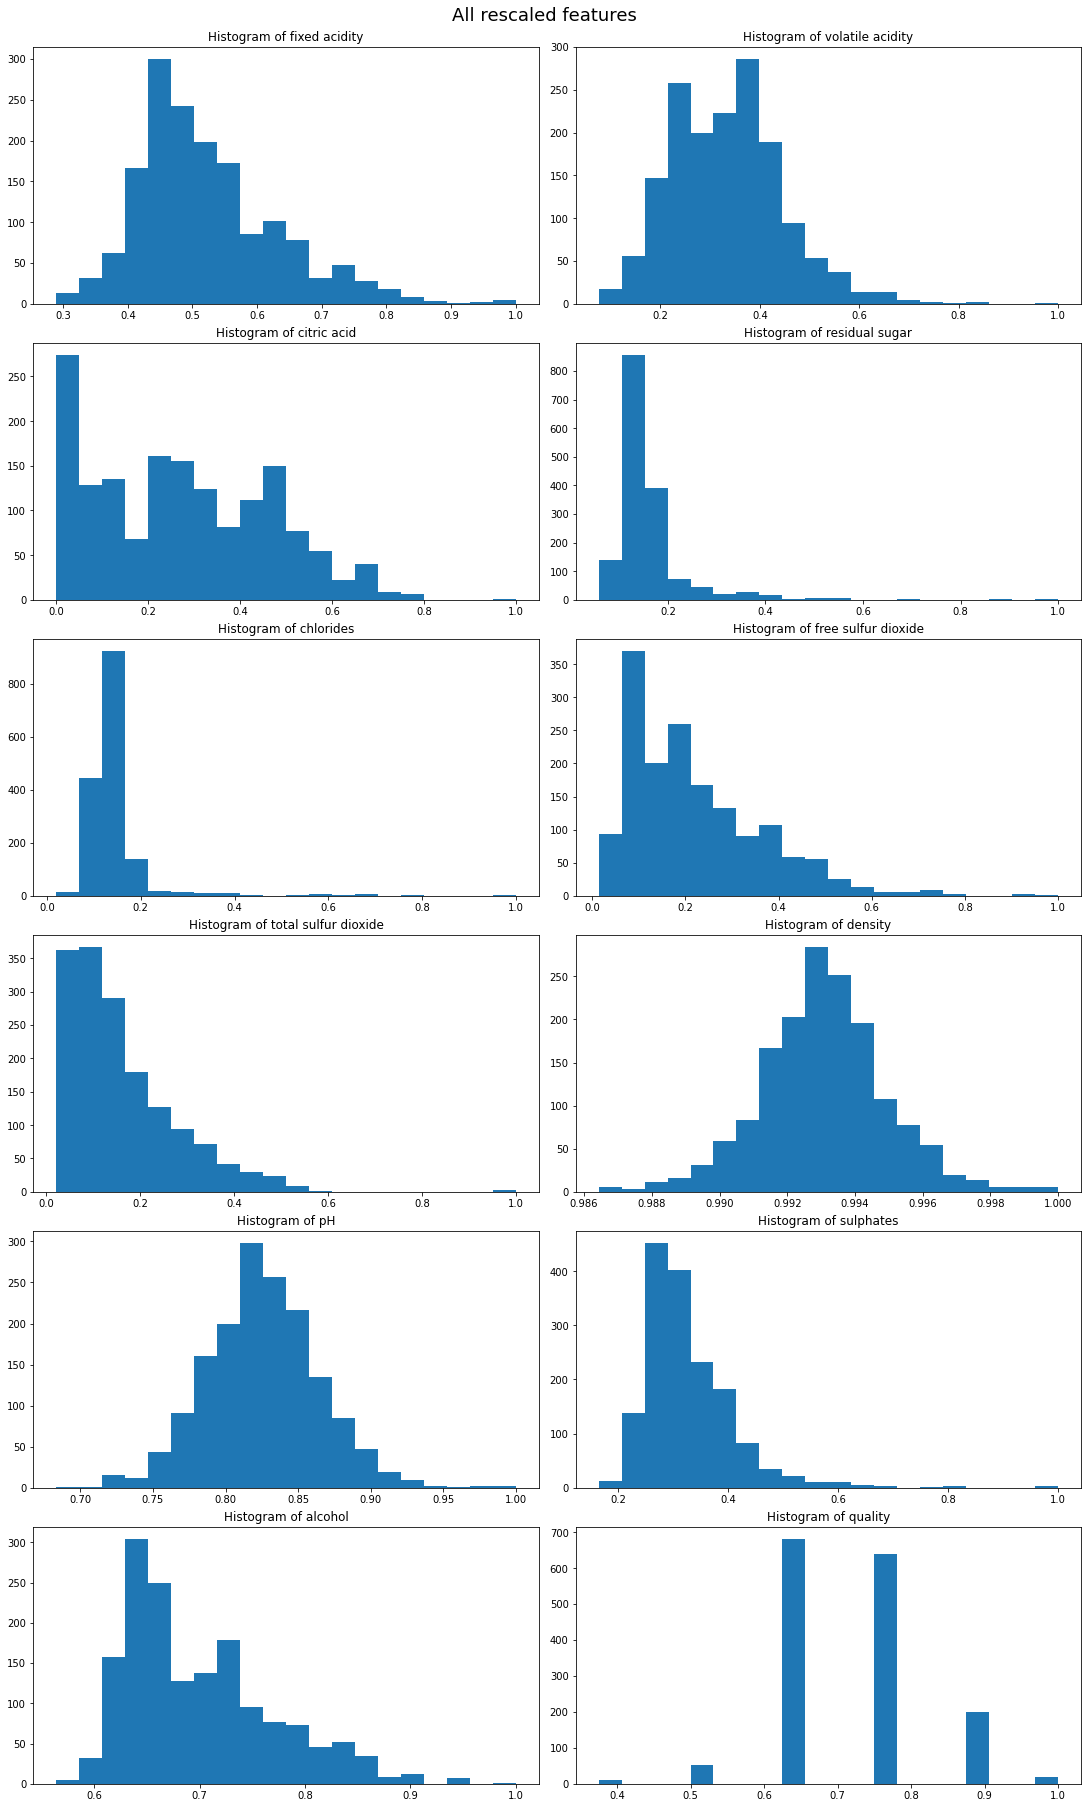

In [16]:
fig, axes = plt.subplots(6, 2, figsize=(15, 25), constrained_layout=True)
for i in range(6):
    for j in range(2):
        feature = np_red_features_reshaped[i, j]
        axes[i, j].hist(df_trans_red[feature], bins=20)
        axes[i, j].set_title(f"Histogram of {np_red_features_reshaped[i, j]}")
fig.suptitle("All rescaled features", fontsize=18)